##### Basic Neural Network

Building a basic neural network using tensorflow and keras to perform classification on fashion_mnist dataset

In [ ]:
import tensorflow as tf
print(f"Tensorflow version: {tf.__version__}")
print(f"Keras version: {tf.keras.__version__}")

Tensorflow version: 2.8.2
Keras version: 2.8.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# loading the dataset
fmnist = tf.keras.datasets.fashion_mnist

In [ ]:
(x_train_full, y_train_full),(x_test_full,y_test_full) = fmnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train_full.shape

(60000, 28, 28)

In [ ]:
np.max(x_train_full[0])

1.0

In [ ]:
np.min(x_train_full[0])

0.0

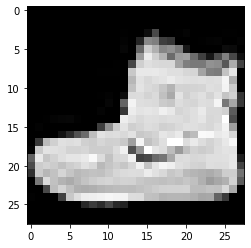

In [ ]:
#viewing the data
plt.imshow(x_train_full[0],cmap = 'gray')

#### Finding the number of classes

In [ ]:
# finding the number of classes
K = len(set(y_train_full))
print("The number of classes are: ",K)

The number of classes are:  10


#### Finding the dimensions of each image

In [ ]:
#finding the dimension of each image
print("Dimension of each image: ",x_train_full[0].shape)

Dimension of each image:  (28, 28)


In [ ]:
#dimension of the entire dataset
print("Dimension of each image: ",x_train_full.shape)

Dimension of each image:  (60000, 28, 28)


#### Display one image from each class

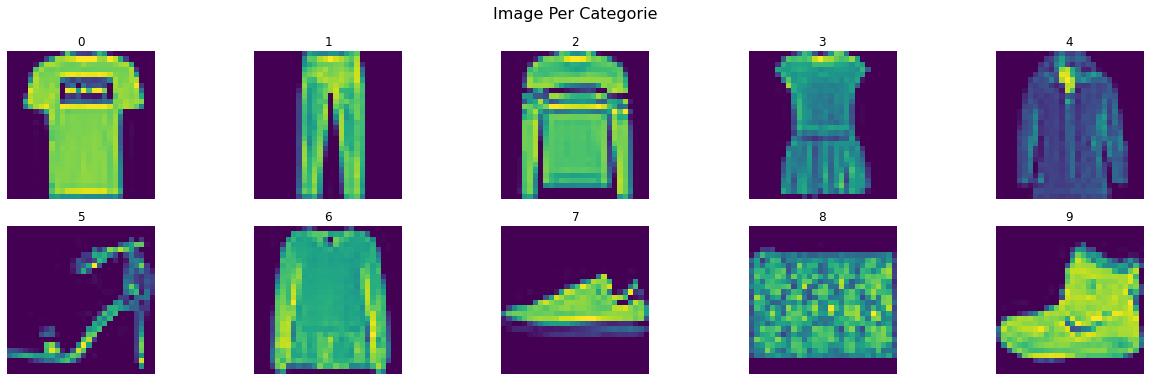

In [ ]:
fig, ax= plt.subplots(nrows= 2, ncols= 5, figsize= (18,5))
plt.suptitle('Image Per Categorie', y= 1.05, fontsize= 16)
i= 0
for j in range(2):
  for k in range(5):
    ax[j,k].imshow(x_train_full[list(y_train_full).index(i)])
    ax[j,k].axis('off')
    ax[j,k].set_title(i)
    i+=1
plt.tight_layout()
plt.show()

#### Performing normalization

In [ ]:
x_train_full = x_train_full/255.0
x_test_full = x_test_full/255.0

In [ ]:
print("max: ",np.max(x_train_full[0]))
print("min: ",np.min(x_train_full[0]))

max:  1.0
min:  0.0


In [ ]:
print("Shape of train set: ", x_train_full.shape)
print("Shape of test set: ", x_test_full.shape)

Shape of train set:  (60000, 28, 28)
Shape of test set:  (10000, 28, 28)


#### Build two neural networks with 2 hidden layers and 5 hidden layers
#### Train and test the networks also

In [ ]:
#first model
model1 = tf.keras.Sequential() #to use the tensor flow sequential API
model1.add(tf.keras.layers.Flatten(input_shape = [28,28], name = "inputLayer")) #Flatten is used to create a 2D tensor to a 1D array
model1.add(tf.keras.layers.Dense(300, activation = "relu", name = "HiddenLayer1"))
model1.add(tf.keras.layers.Dense(100, activation = "relu", name = "HiddenLayer2")) 
model1.add(tf.keras.layers.Dense(10, activation = "softmax", name = "outputLayer")) # used in case of presence of multiple classes
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 HiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 HiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics =["accuracy"])
batch_size = 32
epochs = 15

history1  = model1.fit(x_train_full, y_train_full, batch_size = batch_size, epochs = epochs, validation_split = 0.1)

Epoch 1/15
1688/1688 [==============================] - 8s 5ms/step - loss: 0.4839 - accuracy: 0.8280 - val_loss: 0.3781 - val_accuracy: 0.8643
Epoch 2/15
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3650 - accuracy: 0.8665 - val_loss: 0.3565 - val_accuracy: 0.8708
Epoch 3/15
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3289 - accuracy: 0.8783 - val_loss: 0.3457 - val_accuracy: 0.8750
Epoch 4/15
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3024 - accuracy: 0.8880 - val_loss: 0.3266 - val_accuracy: 0.8785
Epoch 5/15
1688/1688 [==============================] - 8s 5ms/step - loss: 0.2882 - accuracy: 0.8928 - val_loss: 0.3643 - val_accuracy: 0.8718
Epoch 6/15
1688/1688 [==============================] - 8s 4ms/step - loss: 0.2717 - accuracy: 0.8979 - val_loss: 0.3868 - val_accuracy: 0.8702
Epoch 7/15
1688/1688 [==============================] - 8s 5ms/step - loss: 0.2582 - accuracy: 0.9023 - val_loss: 0.3324 - val_accuracy:

In [ ]:
#second model
model2 = tf.keras.Sequential() #to use the tensor flow sequential API
model2.add(tf.keras.layers.Flatten(input_shape = [28,28], name = "inputLayer")) #Flatten is used to create a 2D tensor to a 1D array
model2.add(tf.keras.layers.Dense(380, activation = "relu", name = "HiddenLayer1"))
model2.add(tf.keras.layers.Dense(180, activation = "relu", name = "HiddenLayer2"))
model2.add(tf.keras.layers.Dense(85, activation = "relu", name = "HiddenLayer3"))
model2.add(tf.keras.layers.Dense(41, activation = "relu", name = "HiddenLayer4"))
model2.add(tf.keras.layers.Dense(20, activation = "relu", name = "HiddenLayer5")) 
model2.add(tf.keras.layers.Dense(10, activation = "softmax", name = "outputLayer")) # used in case of presence of multiple classes
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 HiddenLayer1 (Dense)        (None, 380)               298300    
                                                                 
 HiddenLayer2 (Dense)        (None, 180)               68580     
                                                                 
 HiddenLayer3 (Dense)        (None, 85)                15385     
                                                                 
 HiddenLayer4 (Dense)        (None, 41)                3526      
                                                                 
 HiddenLayer5 (Dense)        (None, 20)                840       
                                                                 
 outputLayer (Dense)         (None, 10)               

In [ ]:
model2.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics =["accuracy"])
batch_size = 32
epochs = 15

history2  = model2.fit(x_train_full, y_train_full, batch_size = batch_size, epochs = epochs, validation_split = 0.1)

Epoch 1/15
1688/1688 [==============================] - 12s 7ms/step - loss: 0.5431 - accuracy: 0.8055 - val_loss: 0.4233 - val_accuracy: 0.8410
Epoch 2/15
1688/1688 [==============================] - 10s 6ms/step - loss: 0.3786 - accuracy: 0.8613 - val_loss: 0.3599 - val_accuracy: 0.8697
Epoch 3/15
1688/1688 [==============================] - 10s 6ms/step - loss: 0.3427 - accuracy: 0.8746 - val_loss: 0.3618 - val_accuracy: 0.8722
Epoch 4/15
1688/1688 [==============================] - 10s 6ms/step - loss: 0.3179 - accuracy: 0.8843 - val_loss: 0.3470 - val_accuracy: 0.8738
Epoch 5/15
1688/1688 [==============================] - 10s 6ms/step - loss: 0.3021 - accuracy: 0.8882 - val_loss: 0.3435 - val_accuracy: 0.8795
Epoch 6/15
1688/1688 [==============================] - 10s 6ms/step - loss: 0.2819 - accuracy: 0.8950 - val_loss: 0.3489 - val_accuracy: 0.8777
Epoch 7/15
1688/1688 [==============================] - 10s 6ms/step - loss: 0.2713 - accuracy: 0.8989 - val_loss: 0.3216 - val_ac

In [ ]:
model1.evaluate(x_test_full, y_test_full)

313/313 [==============================] - 1s 3ms/step - loss: 0.3500 - accuracy: 0.8934


[0.35003694891929626, 0.8934000134468079]

In [ ]:
model2.evaluate(x_test_full, y_test_full)

313/313 [==============================] - 1s 3ms/step - loss: 0.3556 - accuracy: 0.8920


[0.35562369227409363, 0.8920000195503235]

#### Compare their performances
The two models with 2 hidden layers and 5 hidden layers respectively have approximately the same accuracy and changing the number of hidden layers did not really affect the accuracy of the network that we built the loss has also not been affected. 

#### Visualizing the performance of both the models using confusion matrix

###### MODEL1

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
Y_pred1 = model1.predict(x_test_full, len(y_test_full))

In [ ]:
y_pred1 = np.argmax(Y_pred1, axis=1)

In [ ]:
print('Confusion Matrix')
cm = confusion_matrix(y_test_full, y_pred1)
print(cm)

Confusion Matrix
[[869   1   9  12   3   1 102   0   3   0]
 [  5 978   1  11   3   0   2   0   0   0]
 [ 21   1 766  11  93   0 108   0   0   0]
 [ 22  11  11 877  42   0  35   0   2   0]
 [  2   0  76  23 822   0  76   0   1   0]
 [  0   0   0   0   0 977   0  14   1   8]
 [116   1  62  17  53   0 745   0   6   0]
 [  0   0   0   0   0  11   0 974   0  15]
 [ 11   0   1   3   1   2   3   4 975   0]
 [  0   0   0   1   0   7   1  40   0 951]]


###### MODEL2

In [ ]:
Y_pred2 = model2.predict(x_test_full, len(y_test_full))

In [ ]:
y_pred2 = np.argmax(Y_pred2, axis=1)

In [ ]:
print('Confusion Matrix')
cm = confusion_matrix(y_test_full, y_pred1)
print(cm)

Confusion Matrix
[[869   1   9  12   3   1 102   0   3   0]
 [  5 978   1  11   3   0   2   0   0   0]
 [ 21   1 766  11  93   0 108   0   0   0]
 [ 22  11  11 877  42   0  35   0   2   0]
 [  2   0  76  23 822   0  76   0   1   0]
 [  0   0   0   0   0 977   0  14   1   8]
 [116   1  62  17  53   0 745   0   6   0]
 [  0   0   0   0   0  11   0 974   0  15]
 [ 11   0   1   3   1   2   3   4 975   0]
 [  0   0   0   1   0   7   1  40   0 951]]
